#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
credit_card_Df=pd.read_csv('../creditcard.csv')

In [54]:
credit_card_Df.shape

(284807, 32)

#### Check null values

In [4]:
credit_card_Df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
credit_card_Df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


## Exploratary Data Analysis

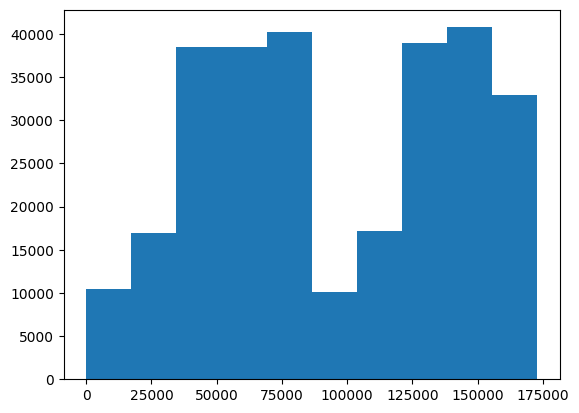

In [6]:
plt.hist(credit_card_Df['Time'])
plt.show()

In [7]:
credit_card_Df['Class'].unique()

array([0, 1])

#### Take sample from the population randomly and check how the outliers visible

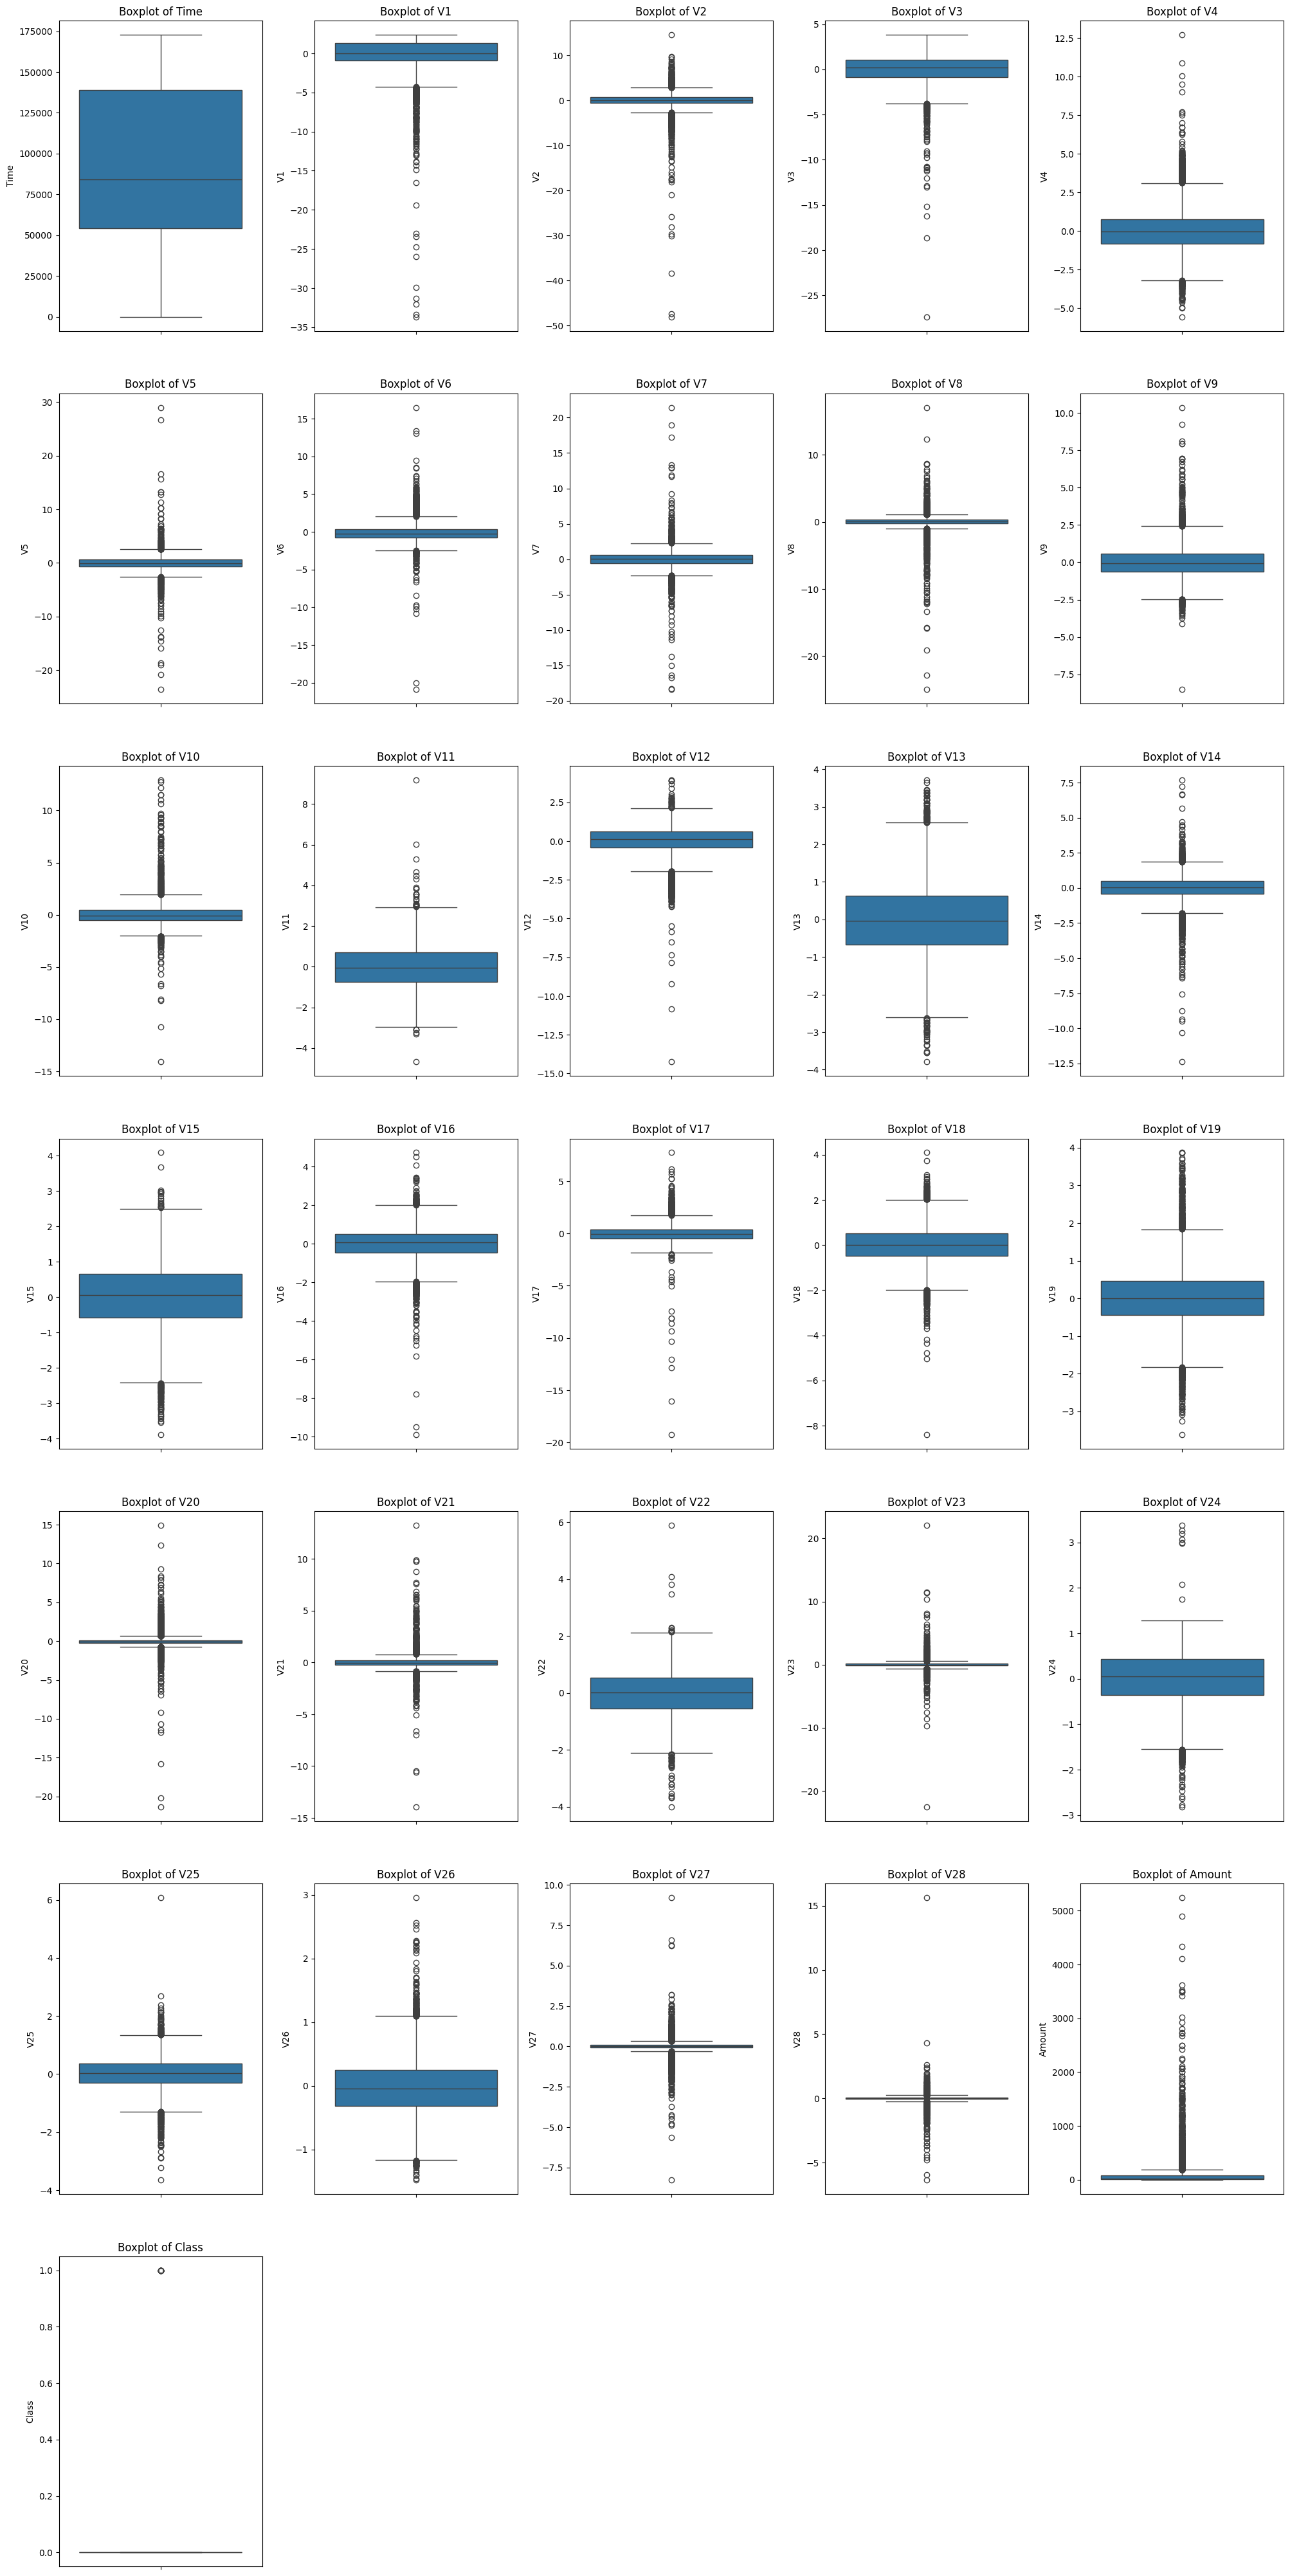

In [8]:

import seaborn as sns



sample_size = 10000 
if len(credit_card_Df) > sample_size:
    sampled_df = credit_card_Df.sample(n=sample_size, random_state=42)
else:
    sampled_df = credit_card_Df


num_cols = len(credit_card_Df.columns)
ncols = 5 
nrows = (num_cols // ncols) + (num_cols % ncols > 0)  

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 40))
ax = ax.flatten()

# Plot each column as a boxplot
for index, col in enumerate(sampled_df.columns):
    sns.boxplot(y=sampled_df[col], ax=ax[index])
    ax[index].set_title(f"Boxplot of {col}")
    ax[index].set_xlabel("")  


for i in range(len(sampled_df.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()


#### Descriptive statistics of fraud and non fraud data

In [56]:
fraud = credit_card_Df[credit_card_Df['Class'] == 1]
non_fraud = credit_card_Df[credit_card_Df['Class'] == 0]

print("Fraud outliers:")
print(fraud[['V27', 'V28', 'Amount']].describe())

print("Non-fraud outliers:")
print(non_fraud[['V27', 'V28', 'Amount']].describe())


Fraud outliers:
              V27         V28       Amount
count  492.000000  492.000000   492.000000
mean     0.170575    0.075667   122.211321
std      1.376766    0.547291   256.683288
min     -7.263482   -1.869290     0.000000
25%     -0.020025   -0.108868     1.000000
50%      0.394926    0.146344     9.250000
75%      0.826029    0.381152   105.890000
max      3.052358    1.779364  2125.870000
Non-fraud outliers:
                 V27            V28         Amount
count  284315.000000  284315.000000  284315.000000
mean       -0.000295      -0.000131      88.291022
std         0.399847       0.329570     250.105092
min       -22.565679     -15.430084       0.000000
25%        -0.070852      -0.052950       5.650000
50%         0.001230       0.011199      22.000000
75%         0.090573       0.077962      77.050000
max        31.612198      33.847808   25691.160000


### Distribution of fraud and non fraud data over the dataset

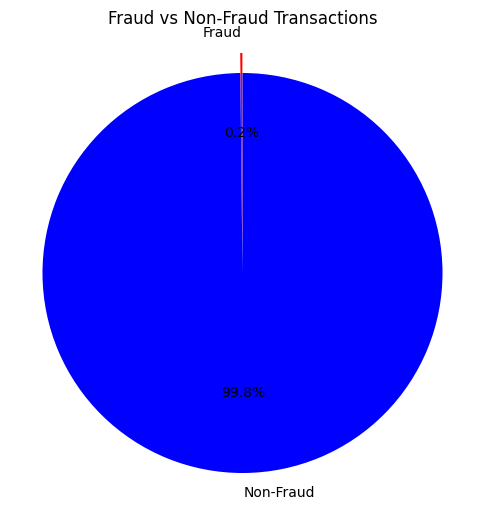

In [57]:
labels = ['Fraud', 'Non-Fraud']
sizes = [len(fraud), len(non_fraud)] 
colors = ['red', 'blue']
explode = (0.1, 0) 


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Fraud vs Non-Fraud Transactions')
plt.axis('equal') 
plt.show()

In [58]:
#To see the distribution of tracks 
credit_card_Df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


### Distribution of time

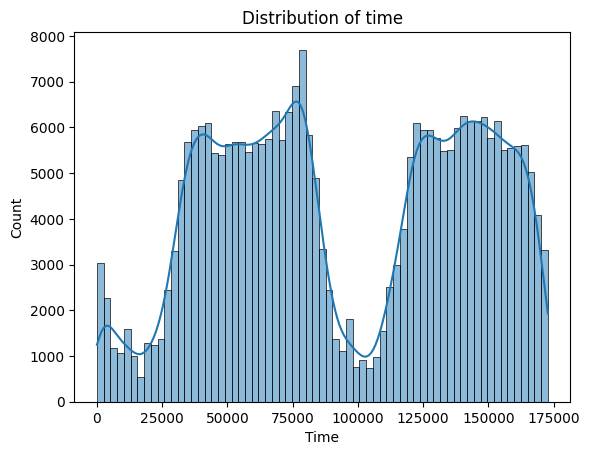

In [59]:
import seaborn as sns


sns.histplot(credit_card_Df['Time'], kde=True)
plt.title('Distribution of time')
plt.show()

### Distribution of amount

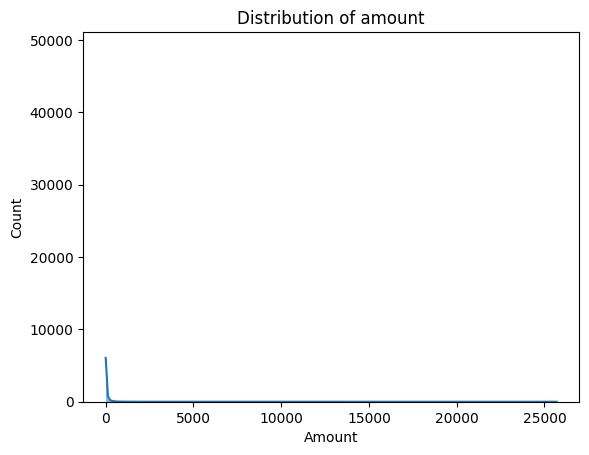

In [60]:



sns.histplot(credit_card_Df['Amount'], kde=True)
plt.title('Distribution of amount')
plt.show()

#### Above shows that there are huge varience amount of transactions in this dataset. 

In [61]:
print(credit_card_Df['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [62]:
credit_card_Df['Amount'].head(15)

0     149.62
1       2.69
2     378.66
3     123.50
4      69.99
5       3.67
6       4.99
7      40.80
8      93.20
9       3.68
10      7.80
11      9.99
12    121.50
13     27.50
14     58.80
Name: Amount, dtype: float64

In [16]:
df_small_amounts = credit_card_Df[(credit_card_Df['Amount'] <= 100) & (credit_card_Df['Amount'] > 0)]
df_small_amounts.count()

Time      226474
V1        226474
V2        226474
V3        226474
V4        226474
V5        226474
V6        226474
V7        226474
V8        226474
V9        226474
V10       226474
V11       226474
V12       226474
V13       226474
V14       226474
V15       226474
V16       226474
V17       226474
V18       226474
V19       226474
V20       226474
V21       226474
V22       226474
V23       226474
V24       226474
V25       226474
V26       226474
V27       226474
V28       226474
Amount    226474
Class     226474
dtype: int64

#### Distribution of  amounts less than 100

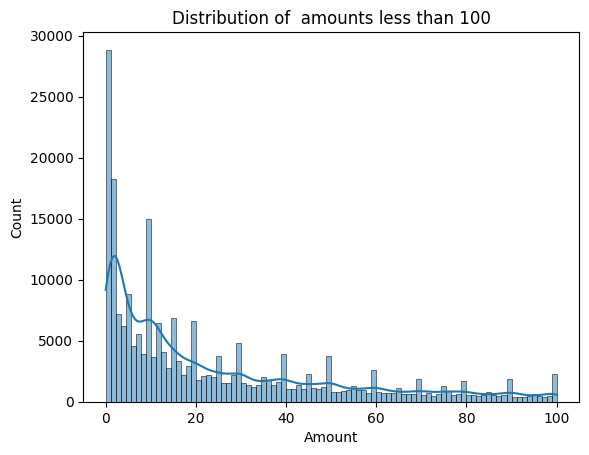

In [63]:
sns.histplot(df_small_amounts['Amount'], kde=True)
plt.title('Distribution of  amounts less than 100')
plt.show()

In [64]:
df_no_money_withdrawls=credit_card_Df[credit_card_Df['Amount']==0]

#### In this dataset lot of amounts less than 100. If we see that as a percentage 

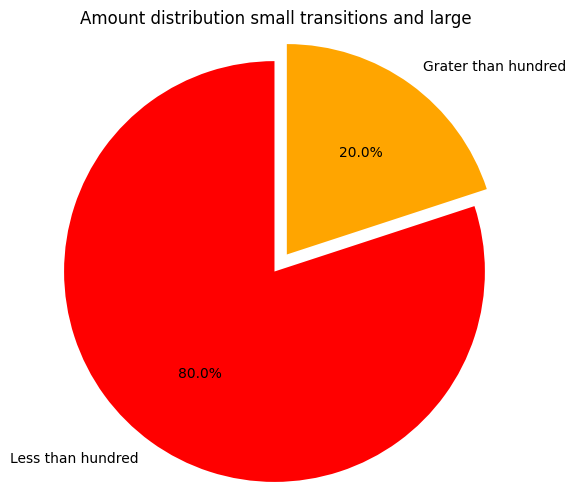

In [65]:
labels = ['Less than hundred', 'Grater than hundred']
sizes = [len(df_small_amounts), len(credit_card_Df)-len(df_small_amounts)-len(df_no_money_withdrawls)] 
colors = ['red', 'orange']
explode = (0.1, 0) 


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Amount distribution small transitions and large')
plt.axis('equal') 
plt.show()

### Withdrawls and non withdrawls percentage

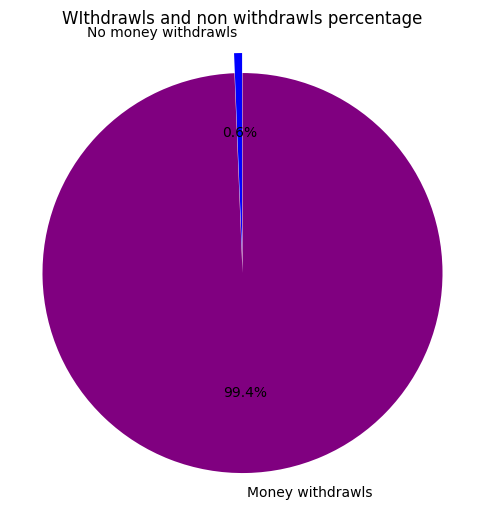

In [66]:

labels = ['No money withdrawls', 'Money withdrawls']
sizes = [len(df_no_money_withdrawls), len(credit_card_Df)-len(df_no_money_withdrawls)] 
colors = ['blue', 'purple']
explode = (0.1, 0) 


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('WIthdrawls and non withdrawls percentage')
plt.axis('equal') 
plt.show()

#### From above we can see that in this dataset lot of customers who came to do transaction have made withdrawls

In [67]:
credit_card_Df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [68]:
credit_card_Df['V1'].max()

np.float64(2.45492999121121)

In [23]:
credit_card_Df['V1'].min()

np.float64(-56.407509631329)

In [24]:
credit_card_Df.shape

(284807, 31)

### Groupby the transactions by Hour and class to see how the  transaction amounts varies 

In [31]:
credit_card_Df['Hour']=credit_card_Df['Time'].apply(lambda x:np.floor(x/3600))
tmp=credit_card_Df.groupby(['Hour','Class'])['Amount'].aggregate(['min','max','count','sum','mean','median','var']).reset_index()
transactions_descriptive_DF=pd.DataFrame(tmp)
transactions_descriptive_DF.columns=['Hour','Class','Min','Max','No_of_transactions','Sum','Mean','Median','Var']
transactions_descriptive_DF.head()

,Hour,Class,Min,Max,No_of_transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


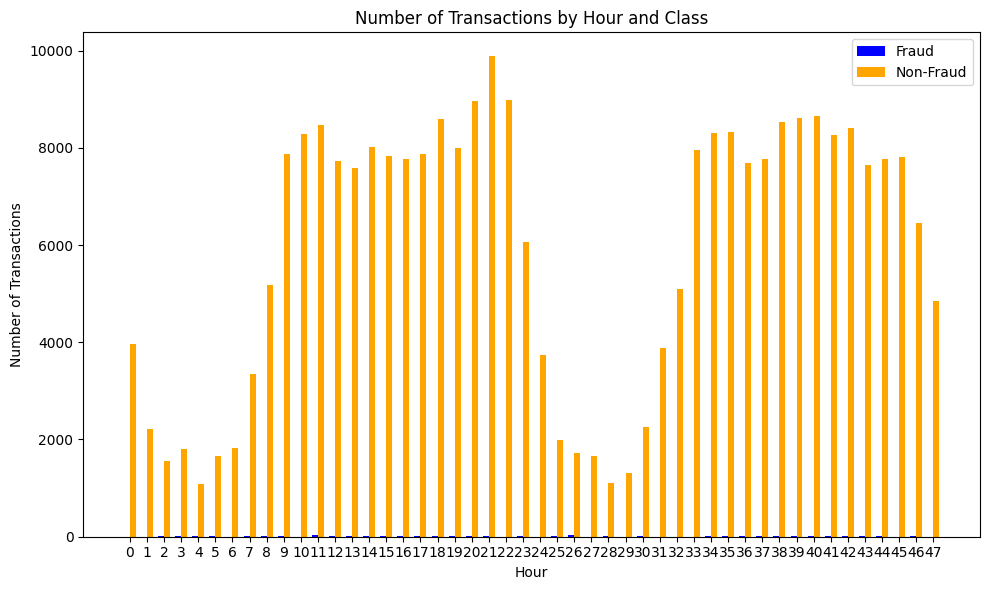

In [38]:

grouped = transactions_descriptive_DF.pivot(index='Hour', columns='Class', values='No_of_transactions')


hours = grouped.index
fraud_ = grouped[1] 
non_fraud_ = grouped[0] 

x = np.arange(len(hours)) 
width = 0.35  


fig, ax = plt.subplots(figsize=(10, 6))
fraud_plot = ax.bar(x - width/2, fraud_, width, label='Fraud', color='blue')
non_fraud_plot = ax.bar(x + width/2, non_fraud_, width, label='Non-Fraud', color='orange')


ax.set_xlabel('Hour')
ax.set_ylabel("Number of Transactions")
ax.set_title('Number of Transactions by Hour and Class')
ax.set_xticks(x)
ax.set_xticklabels(hours.astype(int)) 
ax.legend()


plt.tight_layout()
plt.show()


In [41]:
sample_size=len(fraud)
non_fraud_sample_Df=non_fraud.sample(n=sample_size, random_state=42)
non_fraud_sample_Df



df1_shuffled = fraud.sample(frac=1, random_state=42).reset_index(drop=True)


df2_shuffled = non_fraud_sample_Df.sample(frac=1, random_state=42).reset_index(drop=True)

# Concatenate the two shuffled DataFrames
Balanced_credit_card_Df = pd.concat([df1_shuffled, df2_shuffled], ignore_index=True)





Balanced_credit_card_Df['Hour']=Balanced_credit_card_Df['Time'].apply(lambda x:np.floor(x/3600))
tmp_balanced=Balanced_credit_card_Df.groupby(['Hour','Class'])['Amount'].aggregate(['min','max','count','sum','mean','median','var']).reset_index()
balanced_transactions_descriptive_DF=pd.DataFrame(tmp_balanced)
balanced_transactions_descriptive_DF.columns=['Hour','Class','Min','Max','No_of_transactions','Sum','Mean','Median','Var']
balanced_transactions_descriptive_DF.head()

,Hour,Class,Min,Max,No_of_transactions,Sum,Mean,Median,Var
0,0.0,0,1.00,69.99,7,128.87,18.410000,1.790,758.568600
1,0.0,1,0.00,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,5.00,59.99,3,79.31,26.436667,14.320,866.085233
3,1.0,1,59.00,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.01,500.00,4,762.46,190.615000,131.225,57692.704300


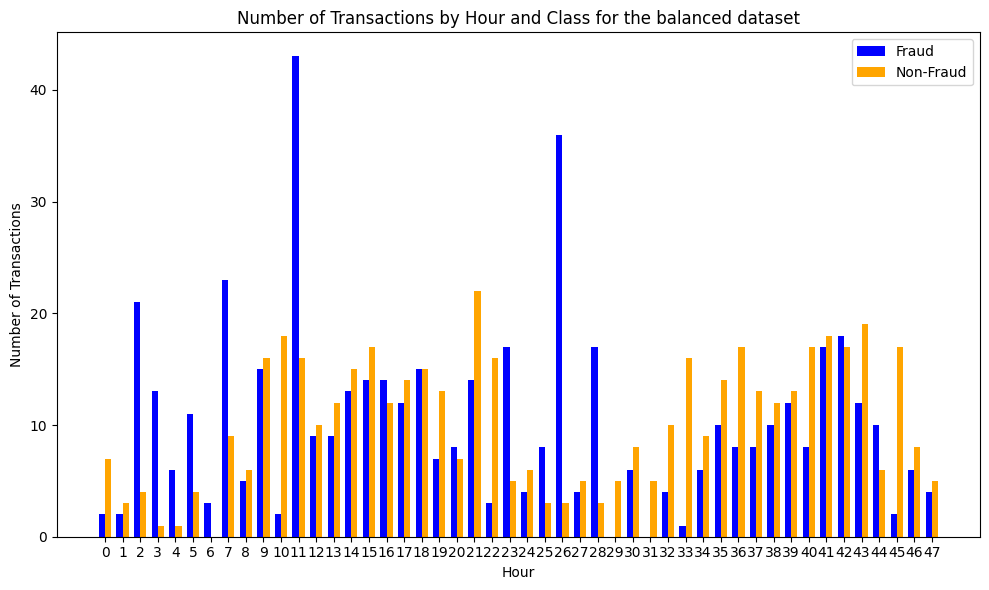

In [43]:
# Corrected code
grouped = balanced_transactions_descriptive_DF.pivot(index='Hour', columns='Class', values='No_of_transactions')

# Extract hours and transaction counts
hours = grouped.index
fraud_ = grouped[1]  # For 'Class = 1' (fraud)
non_fraud_ = grouped[0]  # For 'Class = 0' (non-fraud)

x = np.arange(len(hours))  # Numeric positions for the bars
width = 0.35  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
fraud_plot = ax.bar(x - width/2, fraud_, width, label='Fraud', color='blue')
non_fraud_plot = ax.bar(x + width/2, non_fraud_, width, label='Non-Fraud', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Hour')
ax.set_ylabel("Number of Transactions")
ax.set_title('Number of Transactions by Hour and Class for the balanced dataset')
ax.set_xticks(x)
ax.set_xticklabels(hours.astype(int))  # Convert hours to integer format for labels
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [82]:
credit_card_Df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [83]:
credit_card_Df=credit_card_Df.drop(columns=['Hour'])
X=credit_card_Df.iloc[:,:-1]

y=credit_card_Df['Class']


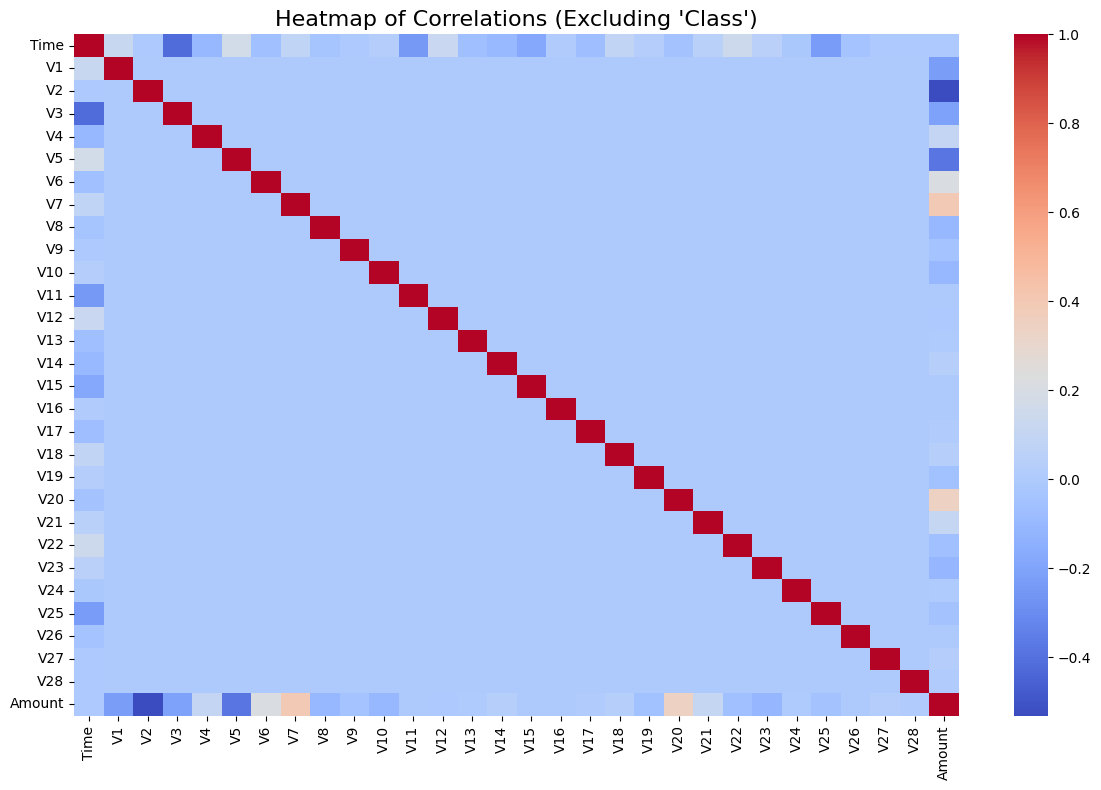

In [100]:
credit_card_df_without_class = credit_card_Df.drop(['Class'], axis=1)


correlation_matrix = credit_card_df_without_class.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)


plt.title("Heatmap of Correlations (Excluding 'Class')", fontsize=16)


plt.tight_layout()
plt.show()

##### Import necessasry libray to train model

In [84]:
from sklearn.ensemble import RandomForestClassifier

### Split dataset into train and test for whole dataset

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3)

In [86]:
model=RandomForestClassifier()

## Train the model with Random Forest Classifier

### Train the model with unbalanced data 

In [87]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
y_pred=model.predict(X_test)

In [89]:
accuracy_score=metrics.accuracy_score(y_test,y_pred)

In [90]:
accuracy_score

0.999602073897218

### Train with balanced data

In [98]:



X_balanced = Balanced_credit_card_Df.drop(['Class', 'Hour'], axis=1)

y_balanced=Balanced_credit_card_Df['Class']
X_trainB,X_testB,y_trainB,y_testB=train_test_split(X_balanced,y_balanced,random_state=42,test_size=.3)
model.fit(X_trainB,y_trainB)


RandomForestClassifier()

In [99]:
#When predict  with the entire dataset 
y_predB=model.predict(X_test)
#When predict with the balanced dataset
y_predB2=model.predict(X_testB)


accuracy_score_balanced=metrics.accuracy_score(y_test,y_predB)
accuracy_score_balanced2=metrics.accuracy_score(y_testB,y_predB2)
print("Accuracy score of the predicting unbalanced  data is ",accuracy_score_balanced)
print("Accuracy score of the predicting balanced data is ",accuracy_score_balanced2)

Accuracy score of the predicting unbalanced  data is  0.9713376168907927
Accuracy score of the predicting balanced data is  0.956081081081081
